**Grid_Search**
 along  with this  column transformer and pipeline too used ....

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression


### this below code is standard code for sklearn
## sklearn itself recommend to use this code ....

In [46]:
v = pd.read_csv('/content/train (3).csv')


In [47]:
v

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
v.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
v.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace = True)

In [50]:
v.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [51]:
x = v.drop(columns = ['Survived'])
y = v['Survived']

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [54]:
numerical_features = ['Age' , 'Fare']

numerical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('scaler' , StandardScaler())
])



In [55]:

categorical_features = ['Embarked','Sex']

categorical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = 'constant' , fill_value = 'missing')),
    ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))
])

In [56]:
processor = ColumnTransformer(transformers = [
    ('num' , numerical_transformer , numerical_features),
    ('cat' , categorical_transformer , categorical_features)
])


 # so actually we transformed numeric column like age , fare
 # as well as categorical column like sex , embarked
 # now we almost transformed 4 column ..so now for making
 # and bring all transformed columns in  dataframe ...
 # for this we have to use  processor object

In [57]:
clf = Pipeline(steps = [
    ('preprocessor' , processor),
    ('classifier' , LogisticRegression())
])

# clf =  pipeline object
# so we are making pipeline ...actually it is used to
# fit transform  like cleaning the data set and so on in just very breif coding
# means just forming pipeline ...

# without this we have to do fit transform scaling and so
# just by manually....

In [58]:
# Training
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

In [68]:
y_pred = clf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score


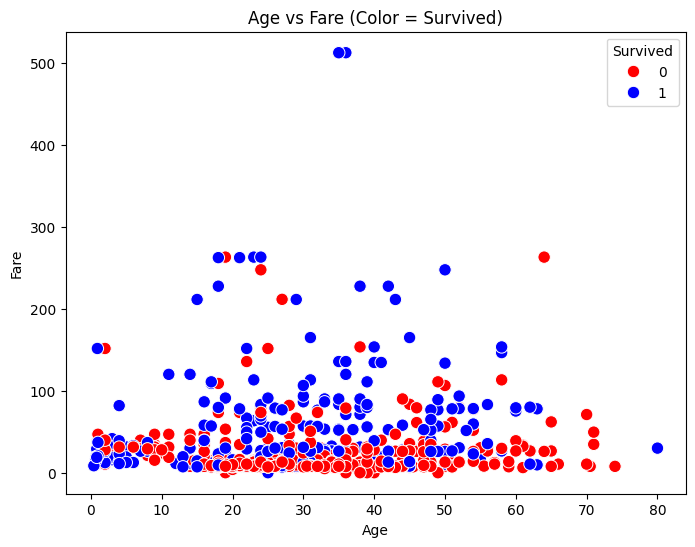

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=v,
                palette={0:'#ff0000', 1:'#0000ff'}, # Bright Red & Blue
                s=80,   # Size of points
                alpha=1)  # Full color, no fade
plt.title("Age vs Fare (Color = Survived)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()


In [70]:
print(accuracy_score(y_test, y_pred)*100)

77.6536312849162


In [71]:
from sklearn import set_config
set_config(display = 'daigram')
clf

#  This line activates scikit-learn’s visualization feature.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

In [76]:
param_grid  = {
    'preprocessor__num__imputer__strategy' : ['mean','median'],
    'preprocessor__cat__imputer__strategy' : ['most_frequent','constant'],
    'classifier__C' : [0.1,1.0,10,100]
}
grid_search = GridSearchCV(clf,param_grid,cv = 10)


In [83]:
grid_search.fit(x_train,y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [87]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.784


In [88]:
print(f"Internal CV score: {grid_search.best_score_ * 100:.0f}%")


Internal CV score: 78%


In [78]:
import pandas as pd   # Typo fix: 'pnadas' → 'pandas'

# Convert GridSearchCV results to a DataFrame
cv_result = pd.DataFrame(grid_search.cv_results_)

# Sort the results by mean_test_score (descending)
cv_result = cv_result.sort_values("mean_test_score", ascending=False)

# Select and display specific columns
cv_result[[
    'param_classifier__C',
    'param_preprocessor__cat__imputer__strategy',
    'param_preprocessor__num__imputer__strategy',
    'mean_test_score'
]]


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.783725
1,0.1,most_frequent,median,0.783725
2,0.1,constant,mean,0.783725
3,0.1,constant,median,0.783725
4,1.0,most_frequent,mean,0.782316
5,1.0,most_frequent,median,0.782316
6,1.0,constant,mean,0.782316
7,1.0,constant,median,0.782316
8,10.0,most_frequent,mean,0.782316
9,10.0,most_frequent,median,0.782316
